In [1]:
import os
os.chdir('../../')
from DeepPurpose import dataset

import pandas as pd

RDKit WARNING: [21:00:48] Enabling RDKit 2019.09.3 jupyter extensions


In [27]:
df_data_IC50 = pd.read_csv('../data/IC50_not_Kd.csv')
df_1000 = df_data_IC50.sample(n = 1000, replace = False).reset_index(drop = True)

In [29]:
from DeepPurpose import oneliner
oneliner.virtual_screening(df_1000['Target Sequence'].values, target_name = None, 
                X_repurpose = df_1000['SMILES'].values, 
                drug_names = None,
                save_dir = './save_folder',               
                pretrained_dir = './save_folder/pretrained_models/DeepPurpose_BindingDB/',
                convert_y = True,
                subsample_frac = 1,
                pretrained = True,
                split = 'random',
                frac = [0.7,0.1,0.2],
                agg = 'agg_mean_max',
                output_len = 30)


Loading customized repurposing dataset...
Checking if pretrained directory is valid...
Beginning to load the pretrained models...
Using pretrained model and making predictions...
virtual screening...
in total: 1000 drug-target pairs
encoding drug...
unique drugs: 998


RDKit ERROR: [21:34:49] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 


Molecules not found and change to zero vectors..
drug encoding finished...
encoding protein...
unique target sequence: 575
protein encoding finished...
Done.
predicting...
---------------
Predictions from model 1 with drug encoding MPNN and target encoding CNN are done...
-------------
virtual screening...
in total: 1000 drug-target pairs
encoding drug...
unique drugs: 998
drug encoding finished...
encoding protein...
unique target sequence: 575
protein encoding finished...
Done.
predicting...
---------------
Predictions from model 2 with drug encoding CNN and target encoding CNN are done...
-------------
virtual screening...
in total: 1000 drug-target pairs
encoding drug...
unique drugs: 998


RDKit ERROR: [21:35:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 


rdkit not found this smiles for morgan: Cc1cc2ccccc2c1-c1ccc(cc1)C(=O)NO convert to all 1 features
drug encoding finished...
encoding protein...
unique target sequence: 575
protein encoding finished...
Done.
predicting...
---------------
Predictions from model 3 with drug encoding Morgan and target encoding CNN are done...
-------------
virtual screening...
in total: 1000 drug-target pairs
encoding drug...
unique drugs: 998


RDKit ERROR: [21:35:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 


rdkit not found this smiles for morgan: Cc1cc2ccccc2c1-c1ccc(cc1)C(=O)NO convert to all 1 features
drug encoding finished...
encoding protein...
unique target sequence: 575
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU. Calculate your time by the unique target sequence #, instead of the entire dataset.
protein encoding finished...
Done.
predicting...
---------------
Predictions from model 4 with drug encoding Morgan and target encoding AAC are done...
-------------
virtual screening...
in total: 1000 drug-target pairs
encoding drug...
unique drugs: 998


RDKit ERROR: [21:50:28] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 


rdkit not found this smiles: Cc1cc2ccccc2c1-c1ccc(cc1)C(=O)NO convert to all 1 features
drug encoding finished...
encoding protein...
unique target sequence: 575
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU. Calculate your time by the unique target sequence #, instead of the entire dataset.
protein encoding finished...
Done.
predicting...
---------------
Predictions from model 5 with drug encoding Daylight and target encoding AAC are done...
-------------
models prediction finished...
aggregating results...
virtual screening...
in total: 1000 drug-target pairs
encoding drug...
unique drugs: 998


RDKit ERROR: [22:06:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 


rdkit not found this smiles: Cc1cc2ccccc2c1-c1ccc(cc1)C(=O)NO convert to all 1 features
drug encoding finished...
encoding protein...
unique target sequence: 575
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU. Calculate your time by the unique target sequence #, instead of the entire dataset.
protein encoding finished...
Done.
predicting...
---------------
Virtual Screening Result
+------+-----------+-------------+---------------+
| Rank | Drug Name | Target Name | Binding Score |
+------+-----------+-------------+---------------+
|  1   |  Drug 960 |  Target 960 |      0.07     |
|  2   |  Drug 303 |  Target 303 |      0.13     |
|  3   |  Drug 803 |  Target 803 |      0.35     |
|  4   |  Drug 228 |  Target 228 |      0.41     |
|  5   |  Drug 37  |  Target 37  |      0.45     |
|  6   |  Drug 107 |  Target 107 |      0.49     |
|  7   |  Drug 582 |  Target 582 |      0.54     |
|  8   |  Drug 177 |  Target 177 |      0.58     |
|  9   |  Drug 838 |  Targ

In [34]:
import pickle
from utils import convert_y_unit
with open('./save_folder/results_aggregation/logits_VS_mean_max.pkl', 'rb') as f:
    list_ = pickle.load(f)
result = convert_y_unit(list_, 'nM', 'p')
from scipy.stats import pearsonr

pearsonr(result, df_1000.Label.values)

(0.2956839158945849, 1.2591800733479032e-21)

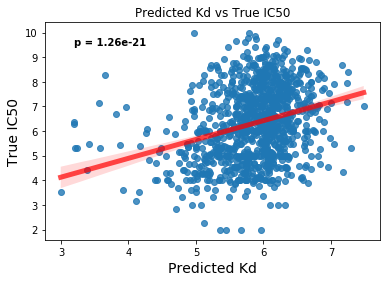

In [36]:
import seaborn as sns
sns.regplot(x=result, y=df_1000.Label.values, line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel('Predicted Kd', fontsize = fontsize)
plt.ylabel('True IC50', fontsize = fontsize)
plt.title('Predicted Kd vs True IC50')

plt.text(3.2, 9.5, "p = 1.26e-21", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('./correlation.pdf')